In [74]:
import pandas as pd

# Load the dataset 
file_path = 'Healthy_Normal.csv'
data = pd.read_csv(file_path)

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86120 entries, 0 to 86119
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sample    86120 non-null  int64  
 1   AC_RED    86120 non-null  float64
 2   AC_IR     86120 non-null  float64
 3   AC_GREEN  86120 non-null  float64
 4   Pressure  86120 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 3.3 MB


(   Sample    AC_RED     AC_IR  AC_GREEN    Pressure
 0       0  1.490566  0.780992  0.656644  101.606691
 1       1  1.505040  0.783953  0.661578  101.795437
 2       2  1.549450  0.823428  0.699080  101.627465
 3       3  1.554714  0.843166  0.711252  101.421505
 4       4  1.553398  0.834613  0.709936  101.574046,
 None)

In [75]:
import numpy as np

signal = data['AC_RED']


sec_derivative = np.gradient(np.gradient(signal, edge_order=2), edge_order=2)
sec_derivative

array([ 0.0472065,  0.0126655, -0.013734 , ..., -0.0008225, -0.008142 ,
       -0.007648 ])

In [76]:

# Add the second derivative to the DataFrame for easier analysis
data['Second_Derivative'] = sec_derivative

# Display a summary of the processed data
data[['Sample', 'AC_RED', 'Second_Derivative']]


,Sample,AC_RED,Second_Derivative
0,0,1.490566,0.047207
1,1,1.505040,0.012666
2,2,1.549450,-0.013734
3,3,1.554714,-0.018669
4,4,1.553398,-0.007402
...,...,...,...
86115,15,2.234352,0.013899
86116,16,2.237641,0.012172
86117,17,2.263301,-0.000822
86118,18,2.280078,-0.008142


In [77]:
data[['Sample', 'AC_RED', 'Second_Derivative']].head()

,Sample,AC_RED,Second_Derivative
0,0,1.490566,0.047207
1,1,1.505040,0.012666
2,2,1.549450,-0.013734
3,3,1.554714,-0.018669
4,4,1.553398,-0.007402


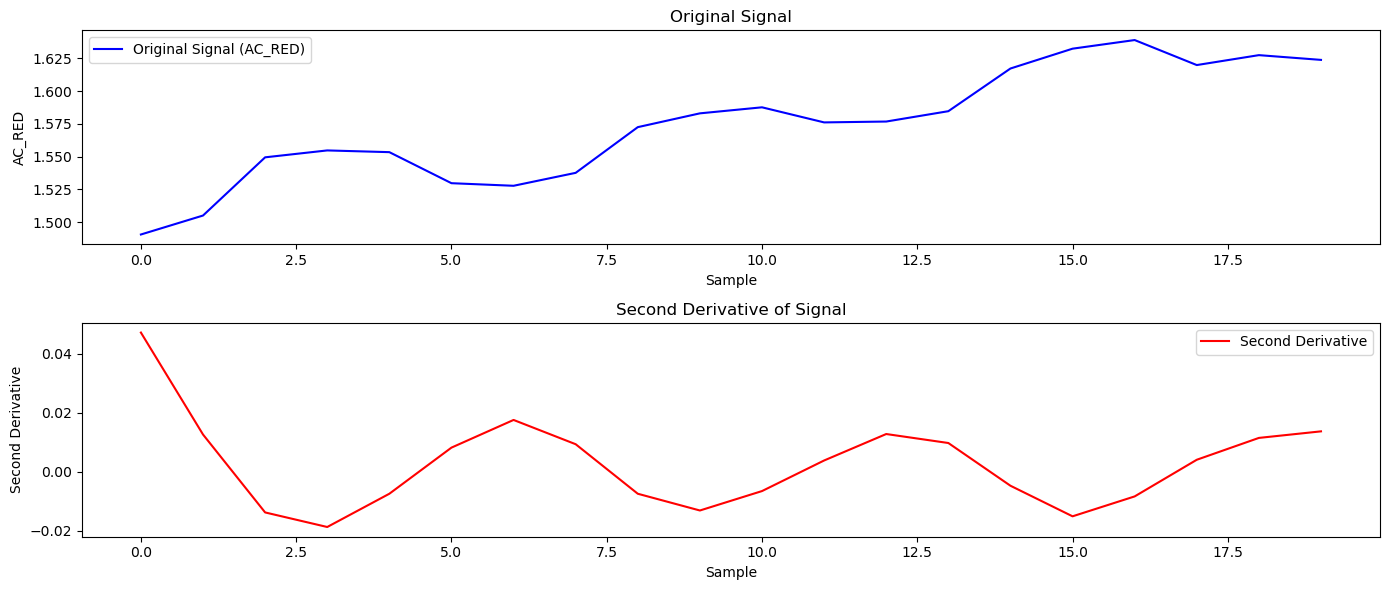

In [78]:
import matplotlib.pyplot as plt

# Plot the original signal
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Sample'].head(20), data['AC_RED'].head(20), label='Original Signal (AC_RED)', color='blue')
plt.title('Original Signal')
plt.xlabel('Sample')
plt.ylabel('AC_RED')
plt.legend()

# Plot the second derivative
plt.subplot(2, 1, 2)
plt.plot(data['Sample'].head(20), data['Second_Derivative'].head(20), label='Second Derivative', color='red')
plt.title('Second Derivative of Signal')
plt.xlabel('Sample')
plt.ylabel('Second Derivative')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [79]:
from scipy.signal import find_peaks

# Identify the local maxima (peaks) and minima (valleys) in the second derivative
# Peaks correspond to A, C, E; Valleys correspond to B, D

# Finding peaks and valleys
peaks, _ = find_peaks(sec_derivative, distance=4)  # Local maxima
valleys, _ = find_peaks(-sec_derivative, distance=4)  # Local minima

# Extracting the relevant points (ABCDE points)
# Assumption: First peak corresponds to A, followed by B, C, D, E in sequence
abcde_indices = sorted(list(peaks) + list(valleys))
abcde_values = sec_derivative[abcde_indices]


In [80]:
abcde_indices


[3,
 6,
 9,
 12,
 15,
 19,
 21,
 26,
 28,
 31,
 34,
 37,
 40,
 43,
 46,
 49,
 52,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 85,
 90,
 93,
 96,
 99,
 102,
 105,
 109,
 111,
 114,
 119,
 121,
 124,
 127,
 130,
 133,
 136,
 139,
 142,
 147,
 149,
 152,
 155,
 158,
 161,
 164,
 167,
 170,
 173,
 177,
 180,
 183,
 186,
 189,
 192,
 195,
 198,
 201,
 205,
 209,
 211,
 214,
 217,
 220,
 224,
 226,
 229,
 233,
 235,
 237,
 242,
 245,
 248,
 251,
 254,
 257,
 260,
 263,
 267,
 270,
 273,
 276,
 279,
 282,
 285,
 289,
 291,
 295,
 298,
 301,
 304,
 307,
 310,
 313,
 316,
 319,
 322,
 325,
 328,
 332,
 335,
 338,
 341,
 344,
 347,
 350,
 354,
 357,
 359,
 363,
 366,
 369,
 372,
 375,
 378,
 381,
 384,
 387,
 392,
 394,
 397,
 400,
 403,
 406,
 409,
 412,
 416,
 418,
 422,
 425,
 428,
 431,
 434,
 437,
 440,
 443,
 446,
 449,
 453,
 456,
 459,
 462,
 465,
 468,
 471,
 474,
 477,
 480,
 483,
 487,
 490,
 493,
 496,
 499,
 502,
 505,
 508,
 512,
 515,
 518,
 521,
 524,
 527,
 530,
 533,
 53

In [81]:
abcde_values

array([-0.01866875,  0.0175995 , -0.0130765 , ..., -0.0142275 ,
        0.01389875, -0.008142  ])

In [82]:
# Organizing into A, B, C, D, E based on sequence
if len(abcde_values) >= 5:  # Ensure we have enough points
    A, B, C, D, E = abcde_values[:5]
    # Calculate ratios
    b_a_ratio = B / A
    c_a_ratio = C / A
    d_a_ratio = D / A
    e_a_ratio = E / A
else:
    b_a_ratio = c_a_ratio = d_a_ratio = e_a_ratio = None

# Display the points and calculated ratios
result={
    "A": A if len(abcde_values) >= 1 else None,
    "B": B if len(abcde_values) >= 2 else None,
    "C": C if len(abcde_values) >= 3 else None,
    "D": D if len(abcde_values) >= 4 else None,
    "E": E if len(abcde_values) >= 5 else None,
    "b/a": b_a_ratio,
    "c/a": c_a_ratio,
    "d/a": d_a_ratio,
    "e/a": e_a_ratio
}
result


{'A': -0.018668749999999956,
 'B': 0.017599500000000046,
 'C': -0.013076499999999991,
 'D': 0.012829749999999973,
 'E': -0.015050250000000043,
 'b/a': -0.942725142283232,
 'c/a': 0.7004486106461344,
 'd/a': -0.6872313357884167,
 'e/a': 0.8061734181453004}

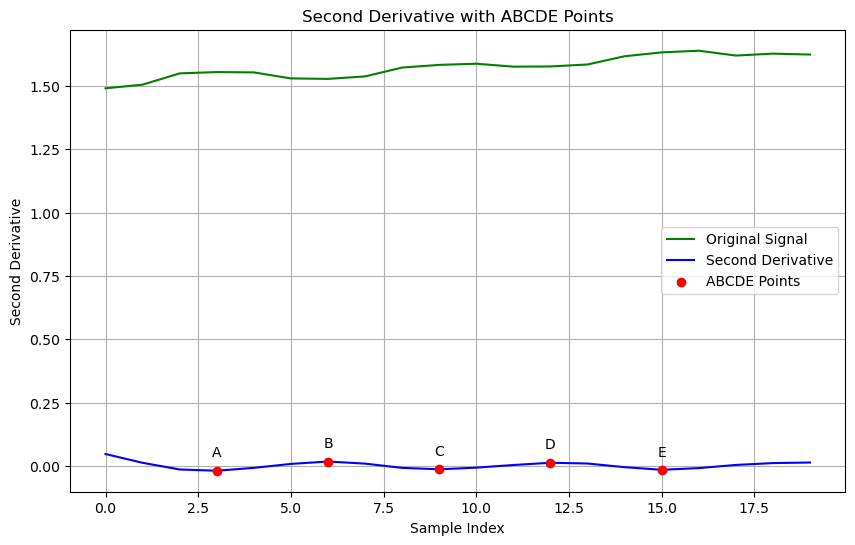

In [83]:
import matplotlib.pyplot as plt

# Ensure we have enough points
if len(abcde_values) >= 5:
    # Plot the second derivative
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[:20], data['AC_RED'][:20], label='Original Signal', color='green')

    plt.plot(data.index[:20], sec_derivative[:20], label='Second Derivative', color='blue')

    # Highlight the A, B, C, D, and E points on the plot
    plt.scatter(abcde_indices[:5], abcde_values[:5], color='red', label='ABCDE Points', zorder=5)

    # Annotate the points with their respective labels
    labels = ['A', 'B', 'C', 'D', 'E']
    for i, label in enumerate(labels):
        plt.annotate(label, (abcde_indices[i], abcde_values[i]), textcoords="offset points", xytext=(0, 10), ha='center')

    # Add titles and labels
    plt.title('Second Derivative with ABCDE Points')
    plt.xlabel('Sample Index')
    plt.ylabel('Second Derivative')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()
else:
    print("Not enough points to plot A, B, C, D, and E.")
    